# **TELCO CUSTOMER CHURN DATA ANALYSIS**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing Data

In [12]:
df = pd.read_csv('data.csv')

Data Overview

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


Data Cleaning

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
df[df['Contract'] == 'Two year'][['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']]


,tenure,Contract,MonthlyCharges,TotalCharges
11,16,Two year,18.95,326.80
15,69,Two year,113.25,7895.15
17,71,Two year,106.70,7382.25
23,58,Two year,59.90,3505.10
28,72,Two year,90.25,6369.45
...,...,...,...,...
7017,51,Two year,20.65,1020.75
7019,39,Two year,20.15,826.00
7028,68,Two year,64.10,4326.25
7037,72,Two year,21.15,1419.40


In [18]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [20]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
df['TotalCharges'].describe()

,TotalCharges
count,7043.000000
mean,2279.734304
std,2266.794470
min,0.000000
25%,398.550000
50%,1394.550000
75%,3786.600000
max,8684.800000


In [23]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analysis

In [24]:
pie1 = df['gender'].value_counts().reset_index(name='Count')
pie1

,gender,Count
0,Male,3555
1,Female,3488


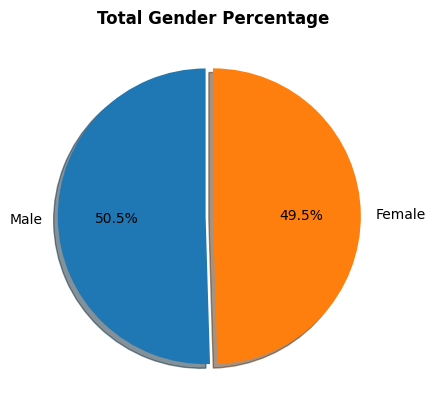

In [25]:
plt.pie(pie1['Count'], labels=pie1['gender'], autopct='%1.1f%%', explode=[0.05, 0], shadow=True, startangle=90)
plt.title('Total Gender Percentage', fontweight='bold')
plt.grid(linewidth=0.1)

In [26]:
pie2 = (df['SeniorCitizen'].value_counts().reset_index(name='Count'))
pie2

,SeniorCitizen,Count
0,0,5901
1,1,1142


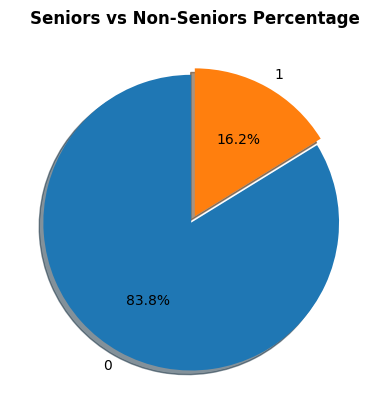

In [27]:
plt.pie(pie2['Count'], labels=pie2['SeniorCitizen'], autopct='%1.1f%%', explode=[0.05, 0], shadow=True, startangle=90)
plt.title('Seniors vs Non-Seniors Percentage', fontweight='bold')
plt.grid(linewidth=0.1)

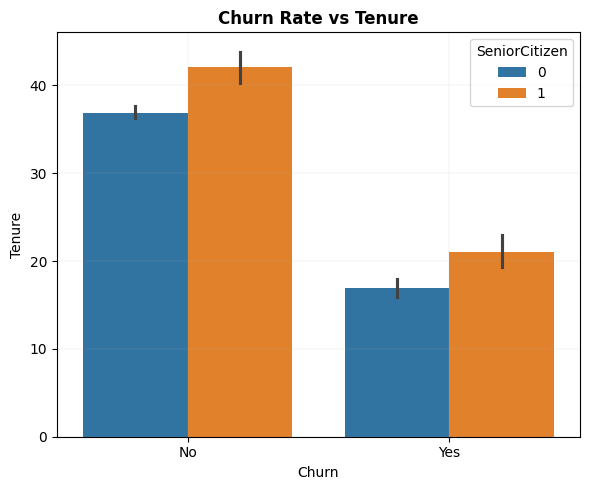

In [28]:
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='Churn', y='tenure', hue='SeniorCitizen')
plt.title('Churn Rate vs Tenure', fontweight='bold')
plt.ylabel('Tenure')
plt.grid(linewidth=0.1)
plt.tight_layout()

Text(0.5, 9.444444444444438, 'Tenure')

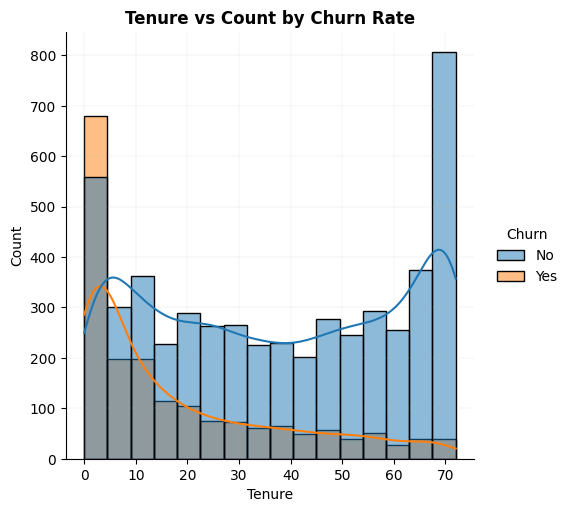

In [29]:
sns.displot(data=df, x='tenure', kde=True, hue='Churn')
plt.title('Tenure vs Count by Churn Rate', fontweight='bold')
plt.grid(linewidth=0.1)
plt.xlabel('Tenure')

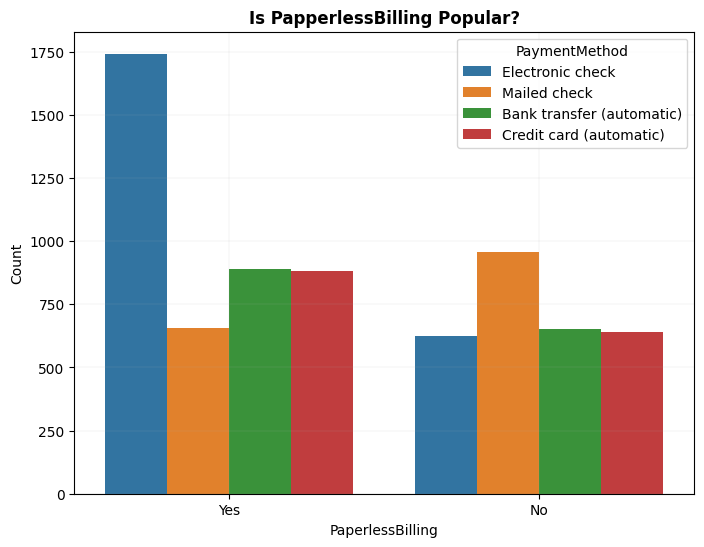

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='PaperlessBilling', hue='PaymentMethod')
plt.ylabel('Count')
plt.title('Is PapperlessBilling Popular?', fontweight='bold')
plt.grid(linewidth=0.1)

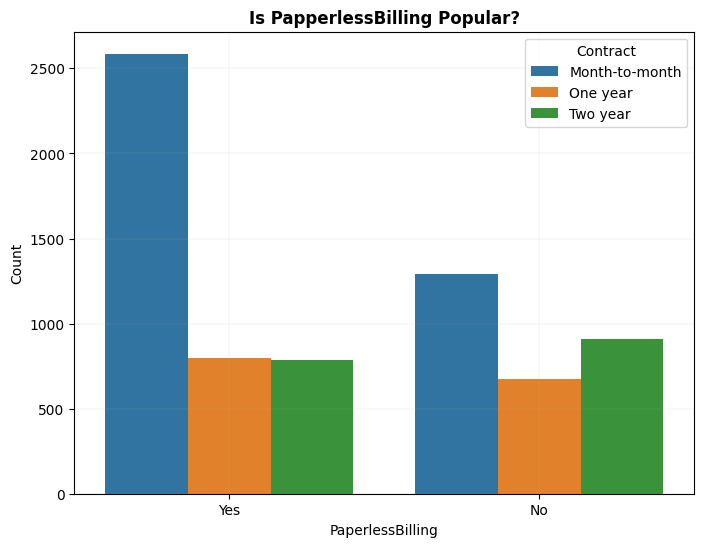

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='PaperlessBilling', hue='Contract')
plt.ylabel('Count')
plt.title('Is PapperlessBilling Popular?', fontweight='bold')
plt.grid(linewidth=0.1)

Text(0, 0.5, 'Count')

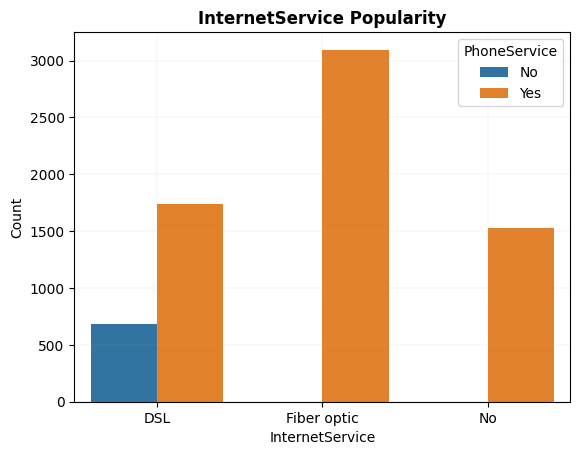

In [32]:
plt.title('InternetService Popularity', fontweight='bold')
sns.countplot(data=df, x='InternetService', hue='PhoneService')
plt.grid(linewidth=0.1)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

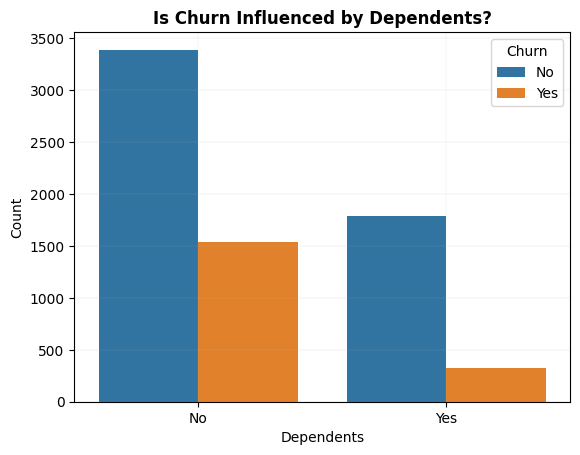

In [33]:
sns.countplot(data=df, x='Dependents', hue='Churn')
plt.grid(linewidth=0.1)
plt.title('Is Churn Influenced by Dependents?', fontweight='bold')
plt.ylabel('Count')

In [34]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


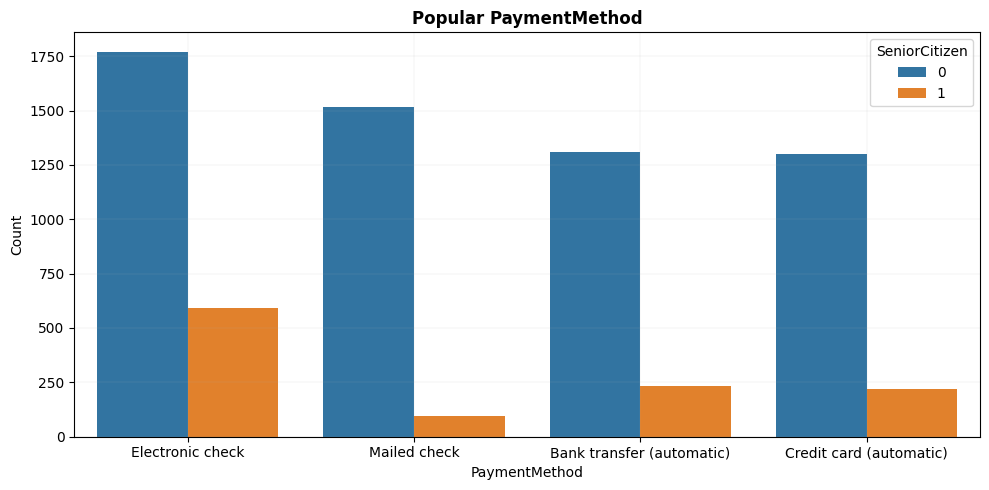

In [35]:
plt.figure(figsize=(10,5))
plt.title('Popular PaymentMethod', fontweight='bold')
sns.countplot(data=df, x='PaymentMethod', hue='SeniorCitizen')
plt.ylabel('Count')
plt.grid(linewidth=0.1)
plt.tight_layout()

In [36]:
pie3 = (df['Churn'].value_counts().reset_index(name='Count'))
pie3

,Churn,Count
0,No,5174
1,Yes,1869


Text(0.5, 1.0, 'Churn Percentage')

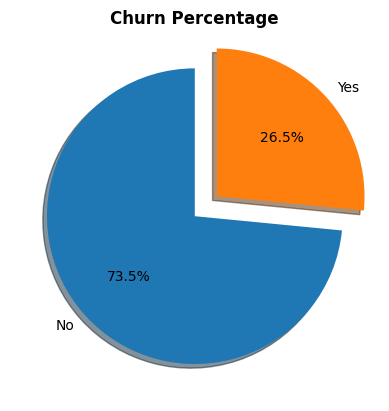

In [37]:
plt.pie(pie3['Count'], labels=pie3['Churn'], autopct='%1.1f%%', shadow=True, explode=[0, 0.2], startangle=90)
plt.title('Churn Percentage', fontweight='bold')

In [38]:
df_pivot1 = df.pivot_table(index='Churn', values='MonthlyCharges', aggfunc='mean')
df_pivot1 = df_pivot1.sort_values(by='MonthlyCharges', ascending=False)

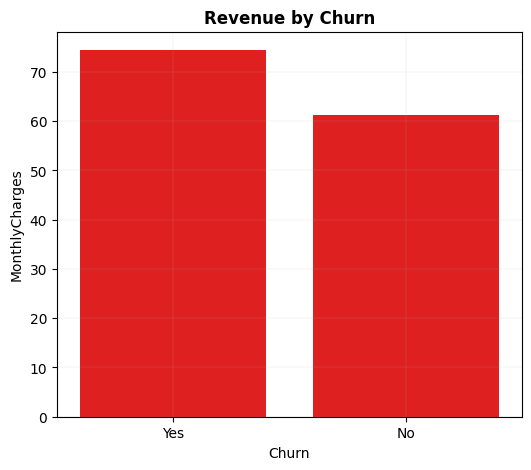

In [39]:
plt.figure(figsize=(6,5))
sns.barplot(data=df_pivot1, x='Churn', y='MonthlyCharges', color='red')
plt.title('Revenue by Churn', fontweight='bold')
plt.grid(linewidth=0.1)


In [40]:
df['tenure'].corr(df['TotalCharges'])

np.float64(0.8261783979502421)

Text(0.5, 1.0, 'Correlation Heatmap for Numerical Columns')

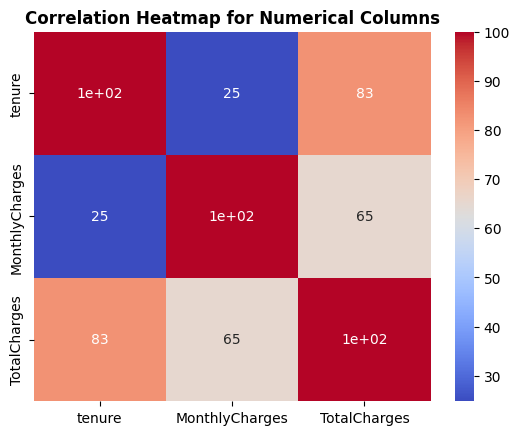

In [74]:
col = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_matrix = df[col].corr() * 100
sns.heatmap(df_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Columns', fontweight='bold')


In [42]:
df_crosstab1 = pd.crosstab(df['Churn'], df['Contract'], normalize='index')
df_crosstab1

Contract,Month-to-month,One year,Two year
Churn,,,
No,0.429068,0.252609,0.318322
Yes,0.885500,0.088818,0.025682


In [43]:
df_crosstab2 = pd.crosstab(df['Churn'], df['Dependents'], normalize='index')
df_crosstab2

Dependents,No,Yes
Churn,,
No,0.655199,0.344801
Yes,0.825575,0.174425


In [44]:
df['Dependents'].value_counts()

,count
Dependents,
No,4933
Yes,2110


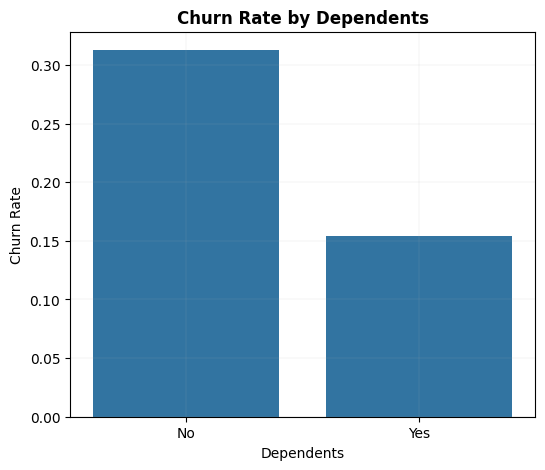

In [45]:
df_rate1 = (df.groupby('Dependents')['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index(name='churn_rate'))
plt.figure(figsize=(6,5))
sns.barplot(data=df_rate1, y='churn_rate', x='Dependents')
plt.title('Churn Rate by Dependents', fontweight='bold')
plt.ylabel('Churn Rate')
plt.grid(linewidth=0.1)

In [46]:
df_rate1

,Dependents,churn_rate
0,No,0.312791
1,Yes,0.154502


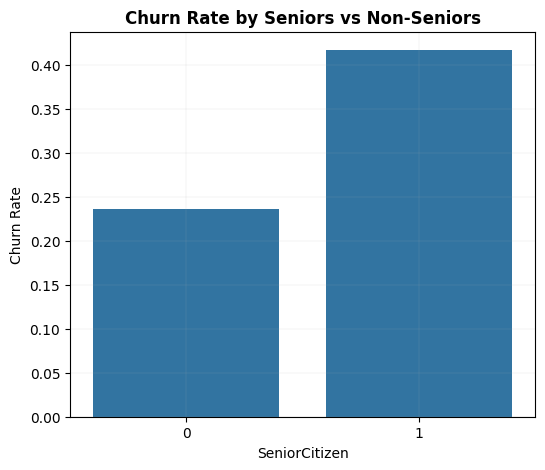

In [47]:
df_rate2 = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index(name='churn_rate')
plt.figure(figsize=(6,5))
sns.barplot(data=df_rate2, x='SeniorCitizen', y='churn_rate')
plt.title('Churn Rate by Seniors vs Non-Seniors', fontweight='bold')
plt.ylabel('Churn Rate')
plt.grid(linewidth=0.1)

In [48]:
df_pivot2 = df.pivot_table(index='SeniorCitizen', columns='Churn', values='MonthlyCharges', aggfunc='mean')
df_pivot2

Churn,No,Yes
SeniorCitizen,,
0,58.618123,72.298098
1,79.182057,80.713445


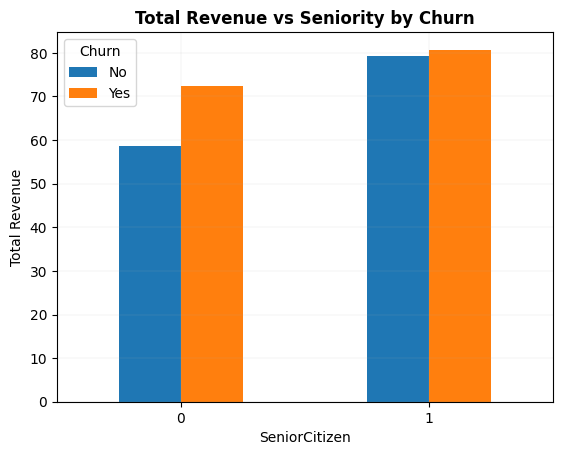

In [72]:
df_pivot2.plot(kind='bar')
plt.ylabel('Total Revenue')
plt.title('Total Revenue vs Seniority by Churn', fontweight='bold')
plt.xticks(rotation=360)
plt.grid(linewidth=0.1)
plt.show()

In [50]:
df_crosstab3 = pd.crosstab(df['Dependents'], df['InternetService'], normalize='index')
df_crosstab3

InternetService,DSL,Fiber optic,No
Dependents,,,
No,0.327590,0.493412,0.178999
Yes,0.381517,0.313744,0.304739


In [51]:
df_rate3 = df.groupby('InternetService')['Dependents'].apply(lambda x: (x == 'Yes').mean()).reset_index(name='dependency_rate')
df_rate3

,InternetService,dependency_rate
0,DSL,0.332507
1,Fiber optic,0.213824
2,No,0.421363


Text(0, 0.5, 'Dependency Rate')

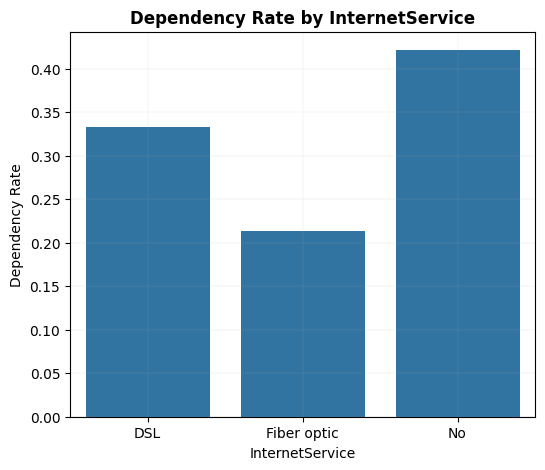

In [52]:
plt.figure(figsize=(6,5))
sns.barplot(data=df_rate3, x='InternetService', y='dependency_rate')
plt.title('Dependency Rate by InternetService', fontweight='bold')
plt.grid(linewidth=0.1)
plt.ylabel('Dependency Rate')


In [53]:
pie4 = (df['PhoneService'].value_counts().reset_index(name='Counts'))
pie4

,PhoneService,Counts
0,Yes,6361
1,No,682


Text(0.5, 1.0, 'Percentage with PhoneService')

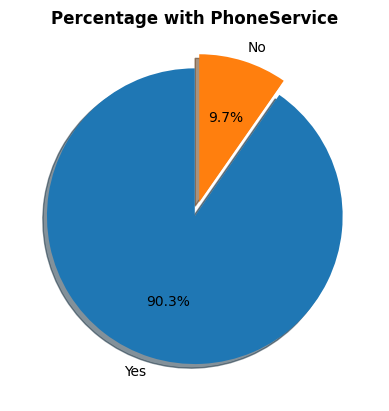

In [54]:
plt.pie(pie4['Counts'], labels=pie4['PhoneService'], autopct='%1.1f%%', startangle=90, shadow=True, explode=[0, 0.1])
plt.title('Percentage with PhoneService', fontweight='bold')

In [55]:
df_crosstab4 = pd.crosstab(df['Churn'], df['PhoneService'], normalize='index')
df_crosstab4


PhoneService,No,Yes
Churn,,
No,0.098956,0.901044
Yes,0.090958,0.909042


In [56]:
df_rate4 = (df.groupby('PhoneService')['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index(name='churn_rate'))
df_rate4

,PhoneService,churn_rate
0,No,0.249267
1,Yes,0.267096


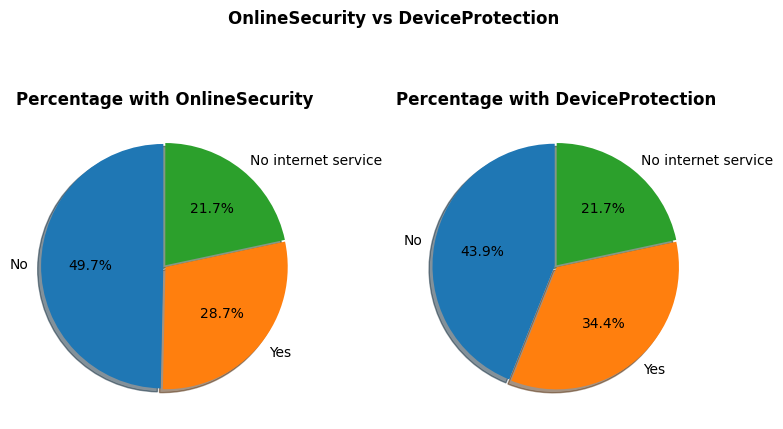

In [57]:
figure, axes = plt.subplots(1, 2, figsize=(8,5))
subpie1 = df['OnlineSecurity'].value_counts().reset_index(name='Counts')
axes[0].pie(subpie1['Counts'], labels=subpie1['OnlineSecurity'], autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.01, 0.01, 0.01])
axes[0].set_title('Percentage with OnlineSecurity', fontweight='bold')
subpie2 = df['DeviceProtection'].value_counts().reset_index(name='Counts')
axes[1].pie(subpie2['Counts'], labels=subpie2['DeviceProtection'], autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.01, 0.01, 0.01])
axes[1].set_title('Percentage with DeviceProtection', fontweight='bold')
plt.suptitle('OnlineSecurity vs DeviceProtection', fontweight='bold')
plt.tight_layout()

In [58]:
bar_1 = df['OnlineSecurity'].value_counts().reset_index(name='Counts')
bar_1

,OnlineSecurity,Counts
0,No,3498
1,Yes,2019
2,No internet service,1526


<function matplotlib.pyplot.show(close=None, block=None)>

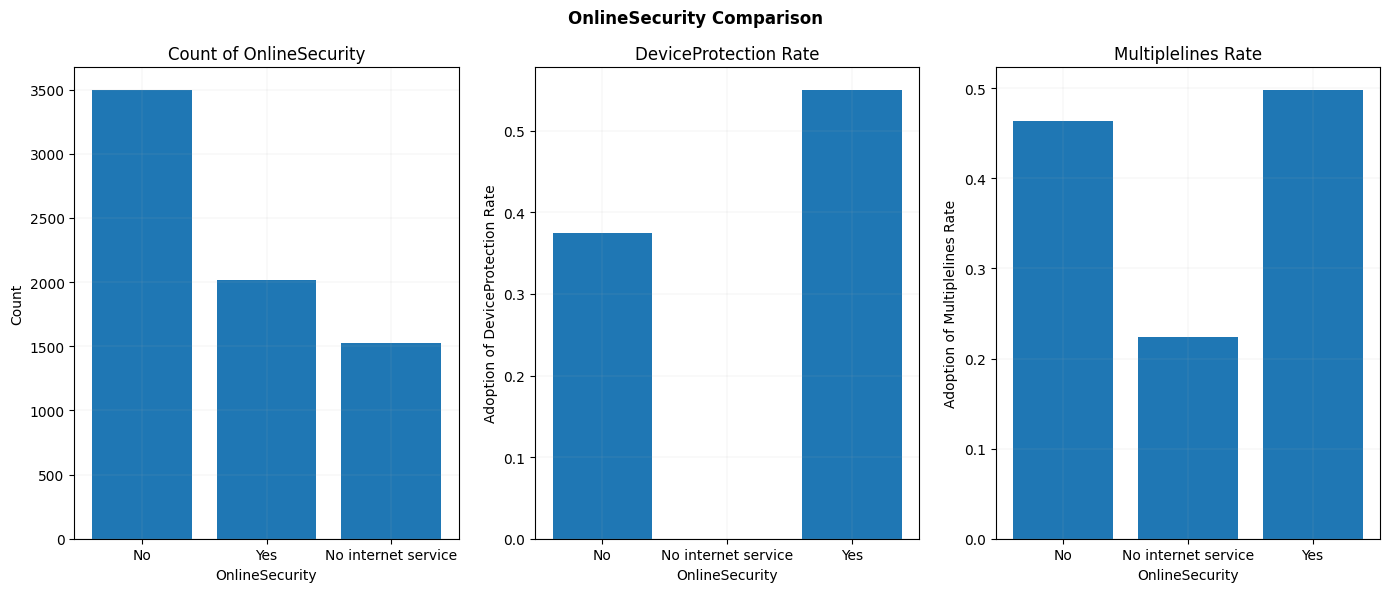

In [59]:
df_rate5 = (df.groupby('OnlineSecurity')[['DeviceProtection','MultipleLines']].apply(lambda x: (x == 'Yes').mean()).reset_index())
figure, axes = plt.subplots(1,3, figsize=(14,6))
axes[1].bar(df_rate5['OnlineSecurity'], df_rate5['DeviceProtection'])
axes[1].set_title('DeviceProtection Rate')
axes[1].set_ylabel('Adoption of DeviceProtection Rate')
axes[1].set_xlabel('OnlineSecurity')
axes[1].grid(linewidth=0.1)
axes[2].bar(df_rate5['OnlineSecurity'], df_rate5['MultipleLines'])
axes[2].set_title('Multiplelines Rate')
axes[2].set_ylabel('Adoption of Multiplelines Rate')
axes[2].set_xlabel('OnlineSecurity')
axes[2].grid(linewidth=0.1)
axes[0].bar(bar_1['OnlineSecurity'], bar_1['Counts'])
axes[0].set_title('Count of OnlineSecurity')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('OnlineSecurity')
axes[0].grid(linewidth=0.1)
figure.suptitle('OnlineSecurity Comparison', fontweight='bold')
plt.tight_layout()
plt.show

In [60]:
trend1 = df[df['Contract'] != 'Month-to-Month' ][['Contract', 'PaperlessBilling']]
trend1

,Contract,PaperlessBilling
0,Month-to-month,Yes
1,One year,No
2,Month-to-month,Yes
3,One year,No
4,Month-to-month,Yes
...,...,...
7038,One year,Yes
7039,One year,Yes
7040,Month-to-month,Yes
7041,Month-to-month,Yes


In [61]:
df_crosstab5 = pd.crosstab(trend1['PaperlessBilling'], trend1['Contract'], normalize='index')
df_crosstab5

Contract,Month-to-month,One year,Two year
PaperlessBilling,,,
No,0.448816,0.234331,0.316852
Yes,0.619995,0.191801,0.188204


Text(0.5, 1.0, 'PaperlessBilling Rate vs Contract')

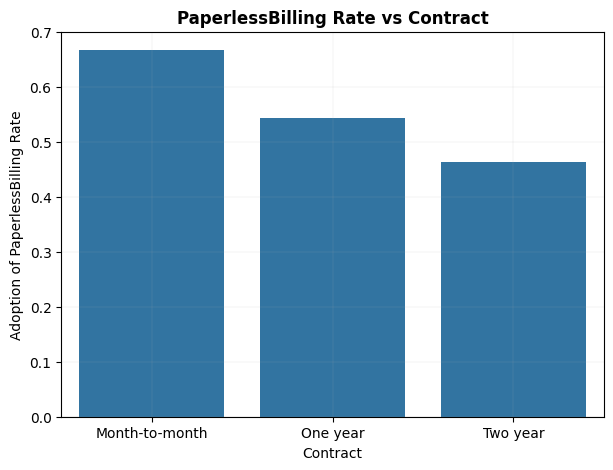

In [62]:
df_rate6 = (trend1.groupby('Contract')['PaperlessBilling'].apply(lambda x: (x == 'Yes').mean()).reset_index(name='Adoption of PaperlessBilling Rate'))
plt.figure(figsize=(7,5))
sns.barplot(data=df_rate6, x='Contract', y='Adoption of PaperlessBilling Rate')
plt.grid(linewidth=0.1)
plt.title('PaperlessBilling Rate vs Contract', fontweight='bold')

In [69]:
df_pivot3 = (df['PaymentMethod'].value_counts().reset_index(name='Count'))
df_pivot3

,PaymentMethod,Count
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


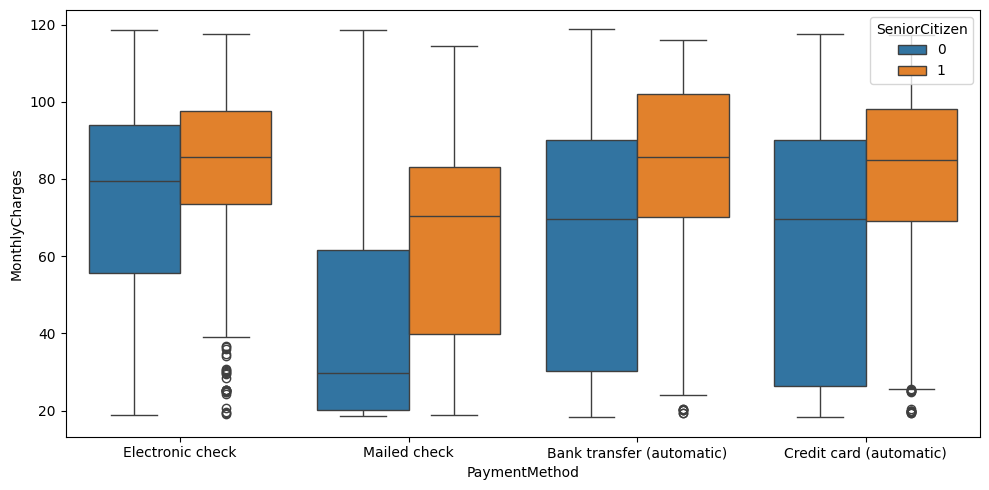

In [64]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='PaymentMethod', y='MonthlyCharges', hue='SeniorCitizen')
plt.tight_layout()
plt.legend(loc='upper right', title='SeniorCitizen')
plt.show()

In [70]:
df_pivot4 = df.pivot_table(index='PaymentMethod', columns='SeniorCitizen', values='MonthlyCharges', aggfunc='mean')
df_pivot4

SeniorCitizen,0,1
PaymentMethod,,
Bank transfer (automatic),64.714760,81.134764
Credit card (automatic),64.288893,79.601810
Electronic check,74.284811,82.132323
Mailed check,42.768412,62.466489


Text(0.5, 1.0, 'Average MonthlyCharge by PaymentMethod')

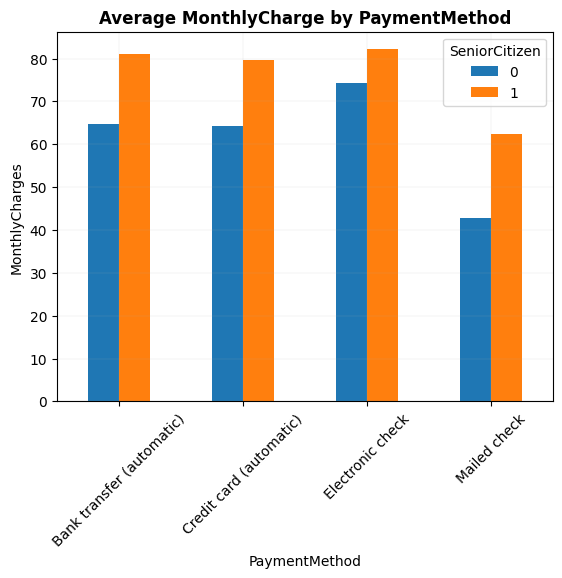

In [71]:
df_pivot4.plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('MonthlyCharges')
plt.grid(linewidth=0.1)
plt.title('Average MonthlyCharge by PaymentMethod', fontweight='bold')

**Insights and Conclusions**

1. **Customer Behavior**

  - Churn rates are higher among senior customers compared to non-seniors.

  - Customers who churn generally have low tenure, suggesting churn occurs early in the customer lifecycle.

  - Customers with dependents exhibit lower churn rates, indicating stronger retention within this group.

2. **Revenue Implications**

  - Churned customers have a higher average monthly charge than retained customers, indicating potential loss of high-value revenue.

  - Senior customers contribute a significant portion of total revenue due to higher average monthly charges.

3. **Service & Payment Preferences**

  - Electronic check users have the highest average monthly charges, while mailed check users have the lowest.

  - Paperless billing is most common among month-to-month contract customers and least common among two-year contracts.

  - DSL internet service is more prevalent among customers with dependents, despite fiber optic being the most popular overall.

  - Customers using mailed checks are less likely to adopt paperless billing.



**Business Implications**

1. Early-stage customer engagement should be prioritized, as most churn occurs within the initial tenure period.

2. High-value customers are at greater risk of churn, suggesting revenue-focused retention strategies are necessary.

3. Senior customers represent a valuable but vulnerable segment, requiring tailored retention initiatives.

4. Encouraging paperless billing and electronic payments could improve operational efficiency and customer engagement.

5. Service bundles targeting households with dependents may further strengthen long-term retention.